# Imports

In [1021]:
%matplotlib inline

In [1022]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [1023]:
from sklearn.model_selection import train_test_split, cross_val_score

In [1024]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [1025]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Описание данных

In [1026]:
description = pd.read_csv('02_otp_desc.csv', sep=';').loc[:,'ПОЛЕ':'ОПИСАНИЕ']
description

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
5,GENDER,пол клиента
6,CHILD_TOTAL,количество детей клиента
7,DEPENDANTS,количество иждивенцев клиента
8,EDUCATION,образование
9,MARITAL_STATUS,семейное положение


# Работа с данными

In [1027]:
train = pd.read_csv('02_otp_train.csv', sep=';')

In [1028]:
train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [1029]:
test = pd.read_csv('02_otp_test.csv', sep=';')

In [1030]:
test.head()

,AGREEMENT_RK,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59909969,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,Образование,...,0,1,2,2,8,0,0,0,0,NaN
1,59910420,48,0,1,1,0,0,Среднее,Состою в браке,NaN,...,0,0,2,1,15,0,0,0,0,NaN
2,59911223,35,1,0,0,1,0,Среднее,Не состоял в браке,Металлургия/Промышленность/Машиностроение,...,0,1,1,1,1,0,0,0,0,NaN
3,59911322,22,1,0,0,0,0,Среднее,Не состоял в браке,Другие сферы,...,0,1,3,2,9,0,0,0,0,NaN
4,59911438,27,1,0,1,2,2,Высшее,Состою в браке,Образование,...,0,1,1,1,5,0,0,0,0,NaN


In [1031]:
train.shape, test.shape

((15223, 52), (14910, 51))

### Объединяем test и train для работы со всеми данными

In [1032]:
df = pd.concat([train, test])

In [1033]:
df.shape

(30133, 52)

In [1034]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30133 entries, 0 to 14909
Data columns (total 52 columns):
AGE                           30133 non-null int64
AGREEMENT_RK                  30133 non-null int64
AUTO_RUS_FL                   30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
COT_PRESENCE_FL               30133 non-null int64
CREDIT                        30133 non-null object
DEPENDANTS                    30133 non-null int64
DL_DOCUMENT_FL                30133 non-null int64
EDUCATION                     30133 non-null object
FACT_ADDRESS_PROVINCE         30133 non-null object
FACT_LIVING_TERM              30133 non-null int64
FACT_PHONE_FL                 30133 non-null int64
FACT_POST_FL                  30133 non-null int64
FAMILY_INCOME                 30133 non-null object
FL_PRESENCE_FL                30133 non-null int64
FST_PAYMENT                   30133 non-null object
GAR_PRESENCE_FL               30133 non-null int64
GENDER             

In [1035]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,30133.0,4.042458e+01,1.161479e+01,21.0,30.0,39.0,50.0,67.0
AGREEMENT_RK,30133.0,6.540639e+07,4.575893e+06,59909969.0,61921011.0,64365821.0,67086107.0,75292243.0
AUTO_RUS_FL,30133.0,7.350745e-02,2.609720e-01,0.0,0.0,0.0,0.0,1.0
CHILD_TOTAL,30133.0,1.094249e+00,9.873811e-01,0.0,0.0,1.0,2.0,10.0
COT_PRESENCE_FL,30133.0,1.018817e-02,1.004226e-01,0.0,0.0,0.0,0.0,1.0
DEPENDANTS,30133.0,6.426841e-01,8.091837e-01,0.0,0.0,0.0,1.0,7.0
DL_DOCUMENT_FL,30133.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
FACT_LIVING_TERM,30133.0,3.337892e+03,3.354065e+05,-26.0,43.0,108.0,204.0,48215880.0
FACT_PHONE_FL,30133.0,6.091992e-01,4.879379e-01,0.0,0.0,1.0,1.0,1.0
FACT_POST_FL,30133.0,9.490924e-01,2.198128e-01,0.0,1.0,1.0,1.0,1.0


In [1036]:
df.head()

,AGE,AGREEMENT_RK,AUTO_RUS_FL,CHILD_TOTAL,COT_PRESENCE_FL,CREDIT,DEPENDANTS,DL_DOCUMENT_FL,EDUCATION,FACT_ADDRESS_PROVINCE,...,REG_FACT_POST_FL,REG_FACT_POST_TP_FL,REG_PHONE_FL,REG_POST_FL,SOCSTATUS_PENS_FL,SOCSTATUS_WORK_FL,TARGET,TERM,TP_PROVINCE,WORK_TIME
0,49,59910150,0,2,0,8000,1,0,Среднее специальное,Оренбургская область,...,1,1,0,1,0,1,0.0,6,Оренбургская область,18.0
1,32,59910230,0,3,0,21650,3,0,Среднее,Кабардино-Балкария,...,1,0,0,1,0,1,0.0,6,Ставропольский край,97.0
2,52,59910525,0,4,0,33126,0,0,Неполное среднее,Иркутская область,...,1,1,0,1,0,1,0.0,12,Иркутская область,84.0
3,39,59910803,0,1,0,"8491,82",1,0,Высшее,Ростовская область,...,0,1,1,0,0,1,0.0,6,Ростовская область,168.0
4,30,59911781,0,0,0,21990,0,0,Среднее,Кабардино-Балкария,...,1,0,0,1,0,1,0.0,12,Ставропольский край,101.0


### Приводим данные к числовым типам

In [1037]:
df['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
df['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
df['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [1038]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print() # выводим пустую строку

EDUCATION
{'Среднее', 'Ученая степень', 'Неполное среднее', 'Высшее', 'Неоконченное высшее', 'Среднее специальное', 'Два и более высших образования'}

FACT_ADDRESS_PROVINCE
{'Брянская область', 'Кабардино-Балкария', 'Коми-Пермяцкий АО', 'Ульяновская область', 'Марийская республика', 'Самарская область', 'Карелия', 'Владимирская область', 'Бурятия', 'Белгородская область', 'Удмуртия', 'Свердловская область', 'Пензенская область', 'Амурская область', 'Агинский Бурятский АО', 'Астраханская область', 'Еврейская АО', 'Ивановская область', 'Саратовская область', 'Чувашия', 'Эвенкийский АО', 'Смоленская область', 'Башкирия', 'Ярославская область', 'Московская область', 'Волгоградская область', 'Омская область', 'Воронежская область', 'Пермская область', 'Хабаровский край', 'Москва', 'Ямало-Ненецкий АО', 'Читинская область', 'Новосибирская область', 'Калужская область', 'Иркутская область', 'Калининградская область', 'Алтайский край', 'Краснодарский край', 'Хакасия', 'Тамбовская область', 'Мур

In [1039]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,30133.0,4.042458e+01,1.161479e+01,21.0,30.0,39.0,50.0,67.0
AGREEMENT_RK,30133.0,6.540639e+07,4.575893e+06,59909969.0,61921011.0,64365821.0,67086107.0,75292243.0
AUTO_RUS_FL,30133.0,7.350745e-02,2.609720e-01,0.0,0.0,0.0,0.0,1.0
CHILD_TOTAL,30133.0,1.094249e+00,9.873811e-01,0.0,0.0,1.0,2.0,10.0
COT_PRESENCE_FL,30133.0,1.018817e-02,1.004226e-01,0.0,0.0,0.0,0.0,1.0
CREDIT,30133.0,1.456781e+04,1.204325e+04,1843.0,6450.0,11490.0,19110.0,150000.0
DEPENDANTS,30133.0,6.426841e-01,8.091837e-01,0.0,0.0,0.0,1.0,7.0
DL_DOCUMENT_FL,30133.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
FACT_LIVING_TERM,30133.0,3.337892e+03,3.354065e+05,-26.0,43.0,108.0,204.0,48215880.0
FACT_PHONE_FL,30133.0,6.091992e-01,4.879379e-01,0.0,0.0,1.0,1.0,1.0


### Работа с пропусками

In [1040]:
df['PREVIOUS_CARD_NUM_UTILIZED'] = df['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)

In [1041]:
df['WORK_TIME'] = df['WORK_TIME'].fillna(df['WORK_TIME'].median())

In [1042]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30133 entries, 0 to 14909
Data columns (total 52 columns):
AGE                           30133 non-null int64
AGREEMENT_RK                  30133 non-null int64
AUTO_RUS_FL                   30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
COT_PRESENCE_FL               30133 non-null int64
CREDIT                        30133 non-null float64
DEPENDANTS                    30133 non-null int64
DL_DOCUMENT_FL                30133 non-null int64
EDUCATION                     30133 non-null object
FACT_ADDRESS_PROVINCE         30133 non-null object
FACT_LIVING_TERM              30133 non-null int64
FACT_PHONE_FL                 30133 non-null int64
FACT_POST_FL                  30133 non-null int64
FAMILY_INCOME                 30133 non-null object
FL_PRESENCE_FL                30133 non-null int64
FST_PAYMENT                   30133 non-null float64
GAR_PRESENCE_FL               30133 non-null int64
GENDER           

### Работа с аномалиями

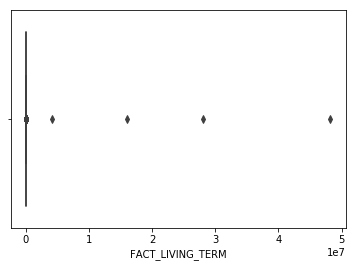

In [1043]:
sns.boxplot(df['FACT_LIVING_TERM'])

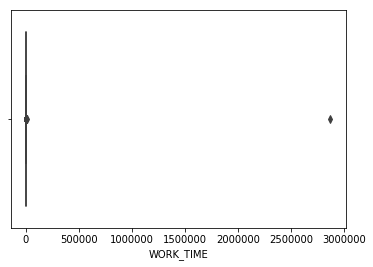

In [1044]:
sns.boxplot(df['WORK_TIME'])

In [1045]:
df['FACT_LIVING_TERM'] = df['FACT_LIVING_TERM'].map(lambda x: abs(x))
df.loc[df['FACT_LIVING_TERM'] > 1000, 'FACT_LIVING_TERM'] = df['FACT_LIVING_TERM'].median()
df.loc[df['WORK_TIME'] > 1000, 'WORK_TIME'] = df['WORK_TIME'].median()

In [1046]:
df['FACT_LIVING_TERM'].min(), df['FACT_LIVING_TERM'].max()

(0.0, 1000.0)

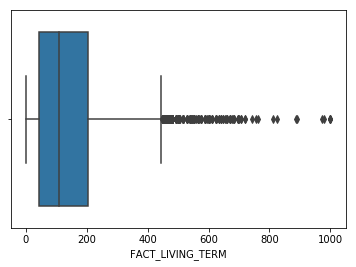

In [1047]:
sns.boxplot(df['FACT_LIVING_TERM'])

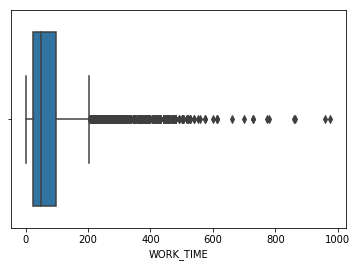

In [1048]:
sns.boxplot(df['WORK_TIME'])

### One-hot encoding

In [1049]:
df = pd.get_dummies(df)

In [1050]:
df.shape

(30133, 444)

### Удаление столбцов и возврат данных к исходному разбиению

In [1051]:
df = df.drop('AGREEMENT_RK', axis=1)

In [1052]:
train = df[~df['TARGET'].isnull()]

test = df[df['TARGET'].isnull()]
test = test.drop('TARGET', axis=1)

In [1053]:
train.isnull().values.any(), test.isnull().values.any()

(False, False)

# Machine learning

In [1054]:
y = train['TARGET']
train = train.drop('TARGET', axis=1)

In [1055]:
# hold-out sampling
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.3, random_state=42)

### Вспомогательные функции

In [1056]:
def print_metrics(y_true, y_pred):
    print('Accuracy: ', accuracy_score(y_true, y_pred))
    print('Precision: ', precision_score(y_true, y_pred))
    print('Recall: ', recall_score(y_true, y_pred))
    print('F1 score: ', f1_score(y_true, y_pred))
    print('ROC auc: ', roc_auc_score(y_true, y_pred))

## DecisionTreeClassifier

In [1057]:
dtc = DecisionTreeClassifier()

In [1058]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [1059]:
dtc_predict = dtc.predict(X_test)
dtc_predict_proba = dtc.predict_proba(X_test)

In [1060]:
print_metrics(y_test, dtc_predict)

Accuracy:  0.8079702211517408
Precision:  0.19038461538461537
Recall:  0.1783783783783784
F1 score:  0.18418604651162793
ROC auc:  0.5367215919808143


## RandomForestClassifier

In [1061]:
rfc = RandomForestClassifier()

In [1062]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [1063]:
rfc_predict = rfc.predict(X_test)
rfc_predict_proba = rfc.predict_proba(X_test)

In [1064]:
print_metrics(y_test, rfc_predict)

Accuracy:  0.8776001751696957
Precision:  0.35714285714285715
Recall:  0.009009009009009009
F1 score:  0.01757469244288225
ROC auc:  0.5033828694097886


## LogisticRegression

In [1065]:
lr = LogisticRegression()

In [1066]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [1067]:
lr_predict = lr.predict(X_test)
lr_predict_proba = lr.predict_proba(X_test)

In [1068]:
print_metrics(y_test, lr_predict)

Accuracy:  0.8776001751696957
Precision:  0.25
Recall:  0.0036036036036036037
F1 score:  0.007104795737122557
ROC auc:  0.5010540450719912


## Accuracy, Precision, Recall - визуализация

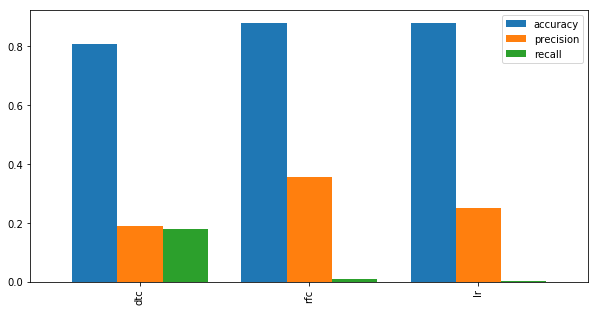

In [1069]:
metrics = pd.DataFrame(index=['dtc', 'rfc', 'lr'], data={
    'accuracy': [
        accuracy_score(y_test, dtc_predict),
        accuracy_score(y_test, rfc_predict),
        accuracy_score(y_test, lr_predict),
    ],
    'precision': [
        precision_score(y_test, dtc_predict),
        precision_score(y_test, rfc_predict),
        precision_score(y_test, lr_predict),
    ],
    'recall': [
        recall_score(y_test, dtc_predict),
        recall_score(y_test, rfc_predict),
        recall_score(y_test, lr_predict)
    ]
    
})

_, ax = plt.subplots(figsize=(10, 5))
metrics.plot(kind='bar', width=0.8, ax=ax)

## Precision Recall curve

In [1070]:
precision_dtc, recall_dtc, pr_dtc_thresholds = precision_recall_curve(y_test, dtc_predict_proba[:,1])
precision_rfc, recall_rfc, pr_rfc_thresholds = precision_recall_curve(y_test, rfc_predict_proba[:,1])
precision_lr, recall_lr, pr_lr_thresholds = precision_recall_curve(y_test, lr_predict_proba[:,1])

(-0.01, 1.01)

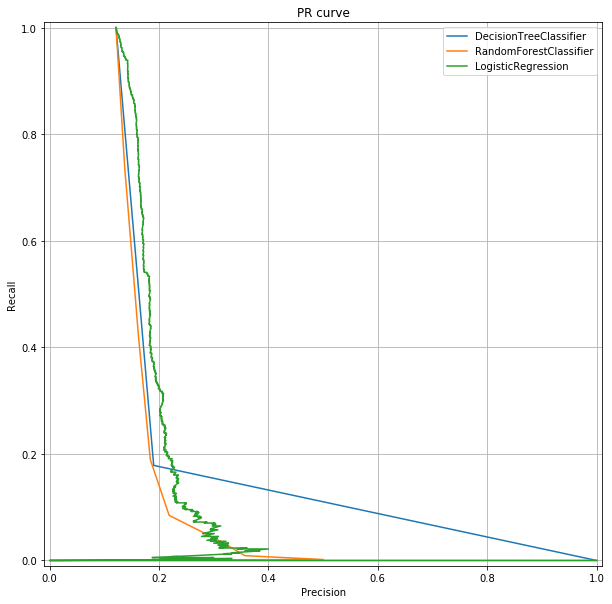

In [1071]:
_, ax = plt.subplots(figsize=(10, 10))

plt.plot(precision_dtc, recall_dtc, label='DecisionTreeClassifier')
plt.plot(precision_rfc, recall_rfc, label='RandomForestClassifier')
plt.plot(precision_lr, recall_lr, label='LogisticRegression')
ax.legend()

plt.ylabel('Recall')
plt.xlabel('Precision')
plt.grid(True)
plt.title('PR curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

## ROC curve

In [1072]:
dtc_fpr, dtc_tpr, dtc_thresholds = roc_curve(y_test, dtc_predict_proba[:,1])
rfc_fpr, rfc_tpr, rfc_thresholds = roc_curve(y_test, rfc_predict_proba[:,1])
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_predict_proba[:,1])

(-0.01, 1.01)

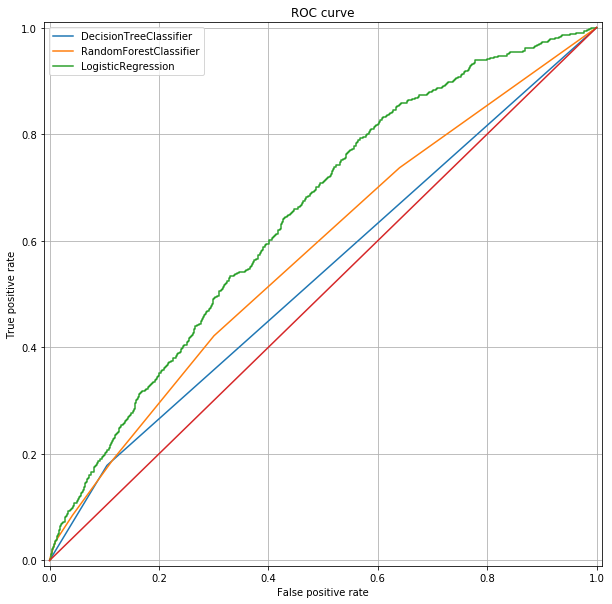

In [1073]:
_, ax = plt.subplots(figsize=(10, 10))

plt.plot(dtc_fpr, dtc_tpr, label='DecisionTreeClassifier')
plt.plot(rfc_fpr, rfc_tpr, label='RandomForestClassifier')
plt.plot(lr_fpr, lr_tpr, label='LogisticRegression')
ax.legend()

plt.plot([0, 1], [0, 1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

## Кросс-валидация

In [1074]:
cross_val_score(
    dtc,
    train,
    y,
    scoring='roc_auc',
    cv=10
)

array([0.52019702, 0.51834575, 0.53650282, 0.50374298, 0.57473601,
       0.53889239, 0.51394605, 0.52201293, 0.53941769, 0.54001096])

In [1075]:
cross_val_score(
    rfc,
    train,
    y,
    scoring='roc_auc',
    cv=10
)

array([0.54690392, 0.57655637, 0.60476226, 0.57788984, 0.57325077,
       0.59748435, 0.55591811, 0.60259104, 0.59828981, 0.5723176 ])

In [1076]:
cross_val_score(
    lr,
    train,
    y,
    scoring='roc_auc',
    cv=10
)

array([0.64708243, 0.65682081, 0.69223924, 0.66312762, 0.65018684,
       0.5698724 , 0.64608748, 0.63208375, 0.65138575, 0.67951269])

# Прогнозирование

In [1077]:
lr.predict_proba(test)

array([[0.85388855, 0.14611145],
       [0.94710815, 0.05289185],
       [0.799977  , 0.200023  ],
       ...,
       [0.81647089, 0.18352911],
       [0.94087096, 0.05912904],
       [0.80539193, 0.19460807]])